In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('../input/habermans-survival-data-set/haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Observation(s)**:

* Data contains values and columns name are missing in the dataset.
* Need to add column data in dataset.
* Column names can be found in column metadata tab in Kaggle.

**name the columns as given below**

In [5]:
df.columns=['Age','Operation_Year','Positive_lymph_node','survival_status']
df.head()

,Age,Operation_Year,Positive_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
df.describe()

,Age,Operation_Year,Positive_lymph_node,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<AxesSubplot:xlabel='survival_status', ylabel='Age'>

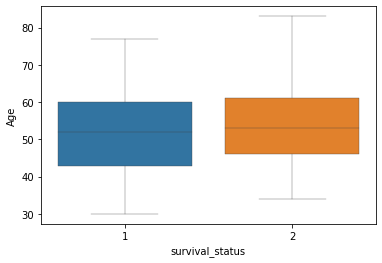

In [10]:
sns.boxplot(x='survival_status',y='Age', data=df, linewidth=0.35)

In [13]:
df['survival_status'].unique()

array([1, 2])

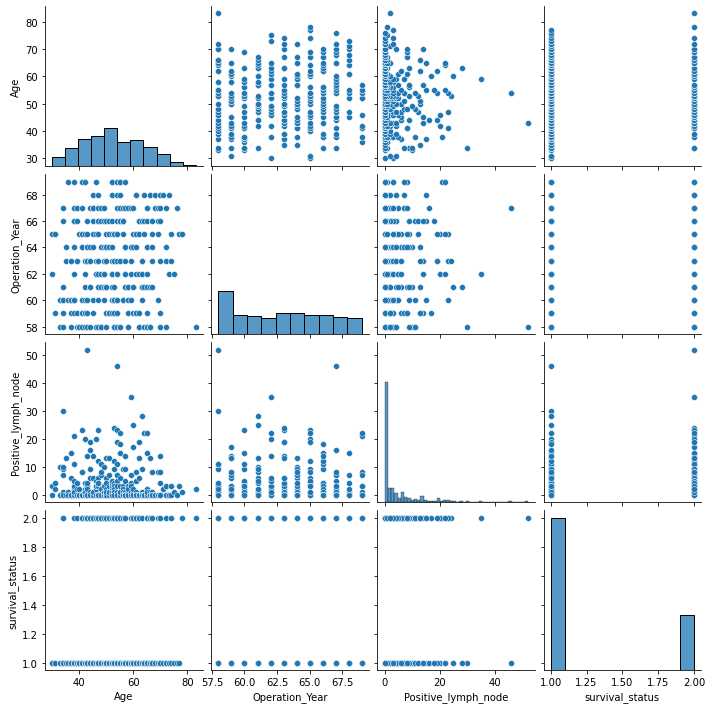

In [14]:
sns.pairplot(data=df)
plt.show()

In [19]:
df['survival_status'].unique()

array([1, 2])

**When lymph nodes are free, or clear, of cancer, the test results are negative. If lymph nodes have some cancer cells in them, they are called positive. Your pathology report will tell you how many lymph nodes were removed, and of those, how many tested positive for the presence of cancer cells**

**Objective:**
To predict whether a patient will survive after 5 years or not based upon the patient's age,his/her operation_year and the number of positive lymph nodes

**BI-VARIATE ANALYSIS**

**2-D Scatter Plot**

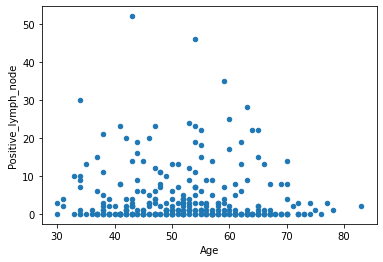

In [20]:
df.plot(x='Age', y='Positive_lymph_node', kind='scatter')
plt.show()

**Obs**
Survival rate is hight as lmph node is zero

2-D Scatter plot with color-coding for each survival status type/class.

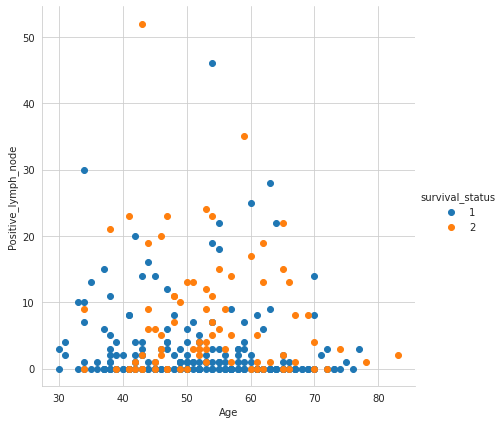

In [22]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status",size=6).map(plt.scatter, "Age","Positive_lymph_node").add_legend()
plt.show()

**Observations**:

* It seems most of the patients have 0 positive lypmh nodes detected.
* Here we clearly see that blue points are not seperated from orange points.
* So, by looking this 2-D scatter plot between 'Age' and 'positive_lymph_nodes' we cannot make any decision regarding patient's survival.
* Therefore, we have to check all combination/pair of features to make good classification/decision.
* Number of Combinations of features : 3C2 = 3 (excluding class-attribute 'Survival')
* Now, for these combination to analyse,Pair-Plot concept is used

**Pair Plot**

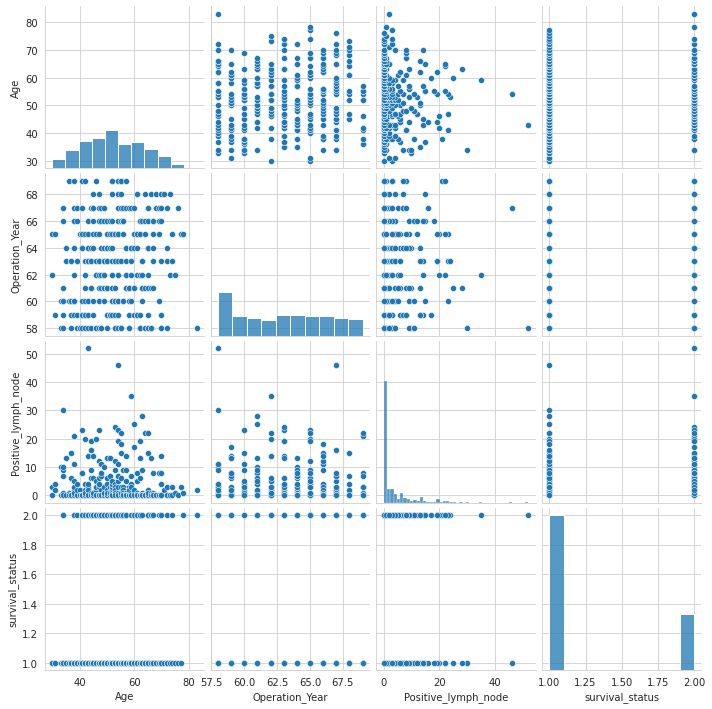

In [24]:
sns.set_style('whitegrid')
sns.pairplot(data=df)
plt.show()

**Age Vs Possitive Lymph Node**

**UNIVARIATE ANALYSIS**

Histogram, PDF

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


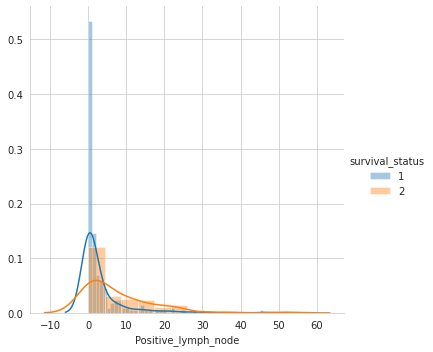

In [35]:
sns.FacetGrid(df, hue="survival_status",size=5).map(sns.distplot,"Positive_lymph_node").add_legend()
plt.show()

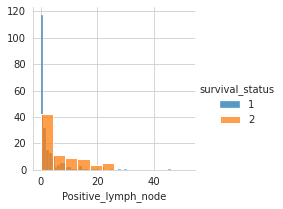

In [29]:
sns.FacetGrid(df, hue='survival_status').map(sns.histplot, "Positive_lymph_node").add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


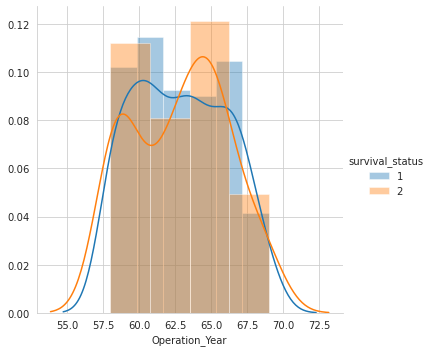

In [40]:
sns.FacetGrid(df, hue="survival_status",size=5).map(sns.distplot,"Operation_Year").add_legend()
plt.show()

> Observation:

* From the above PDFs(Univariate analysis) both Age and Operation_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.
* 
* positive_lymph_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero positive_lymph_nodes.
* 
* From the year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1965

# divide the data set in two according to the label Survival status 
# alive means status=1 and dead means status =2

In [41]:
alive=df.loc[df['survival_status']==1]
dead=df.loc[df['survival_status']==2]

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


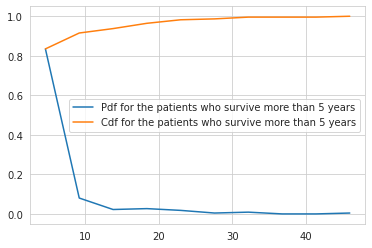

In [45]:
count,bin_edges=np.histogram(alive['Positive_lymph_node'], bins=10, density=True)
pdf=count/sum(count)

print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
            

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


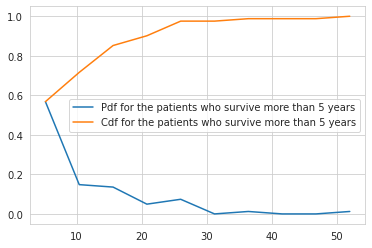

In [46]:
count,bin_edges=np.histogram(dead['Positive_lymph_node'], bins=10, density=True)
pdf=count/sum(count)

print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
            

# Mean, Variance and Std-dev 

In [47]:
df.describe()

,Age,Operation_Year,Positive_lymph_node,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Alive statics

In [51]:
print("Summary Statistics of Patients who are alive within 5 years:")
alive.describe()

Summary Statistics of Patients who are alive within 5 years:


,Age,Operation_Year,Positive_lymph_node,survival_status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


# Dead statics

In [50]:
print("Summary Statistics of Patients who are dead within 5 years:")
dead.describe()

Summary Statistics of Patients who are dead within 5 years:


,Age,Operation_Year,Positive_lymph_node,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Observations:

From both the tables we can observe that almost for all the features the statistics are similar except for positive_lymph_nodes.

The mean(average) of positive_lymph_nodes is more for people who died within 5 years than people who have survived for more than 5 years

From the observation of CDFs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of positive_lymph_node have survived.

# Median, Percentile, Quantile, IQR, MAD

In [53]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedian")
print(np.median(alive['Positive_lymph_node']))
#Median with an outlier
print(np.median(np.append(alive['Positive_lymph_node'],50)))

print(np.median(dead['Positive_lymph_node']))

print("\nQuatitle")

print(np.percentile(alive['Positive_lymph_node'], np.arange(0,100,0.25)))
print(np.percentile(dead['Positive_lymph_node'],np.arange(0,100,0.25)))

print("\n90thpercentile")
print(np.percentile(alive['Positive_lymph_node'],90))
print(np.percentile(dead['Positive_lymph_node'],90))




Median
0.0
0.0
4.0

Quatitle
[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.

In [54]:
from statsmodels import robust
print("\nMedian Absoute Deviation")
print(robust.mad(alive['Positive_lymph_node']))
print(robust.mad(dead['Positive_lymph_node']))


Median Absoute Deviation
0.0
5.930408874022408


**The median absolute deviation is a measure of statistical dispersion. Moreover, the MAD is a robust statistic, being more resilient to outliers in a data set than the standard deviation. In the standard deviation, the distances from the mean are squared, so large deviations are weighted more heavily, and thus outliers can heavily influence it. In the MAD, the deviations of a small number of outliers are irrelevant.**

# Box plot and Whiskers

"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

[]

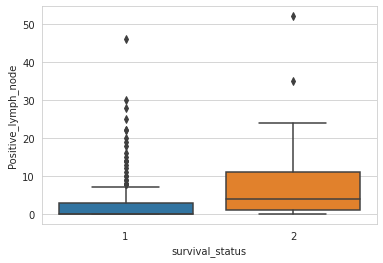

In [58]:
sns.boxplot(x='survival_status',y='Positive_lymph_node', data=df)
plt.plot()

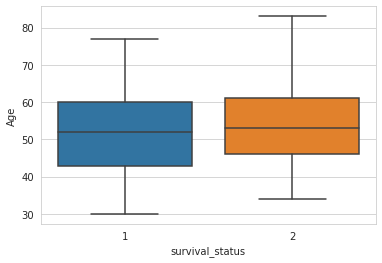

In [60]:
sns.boxplot(x='survival_status', y='Age', data=df)
plt.show()

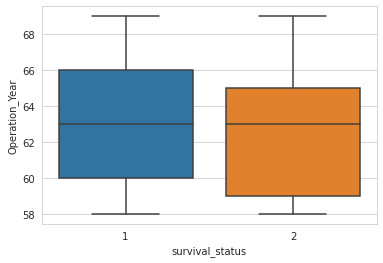

In [63]:
sns.boxplot(x='survival_status', y='Operation_Year', data=df)
plt.show()

# Violin Plot

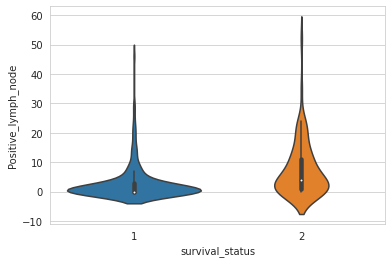

In [65]:
sns.violinplot(x='survival_status', y='Positive_lymph_node', data=df)
plt.show()

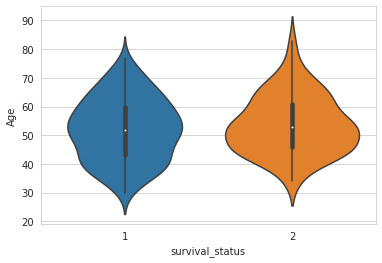

In [66]:
sns.violinplot(x='survival_status', y='Age', data=df)
plt.show()

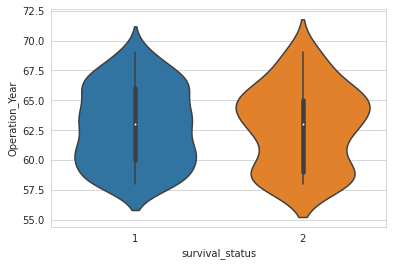

In [67]:
sns.violinplot(x='survival_status', y='Operation_Year', data=df)
plt.show()

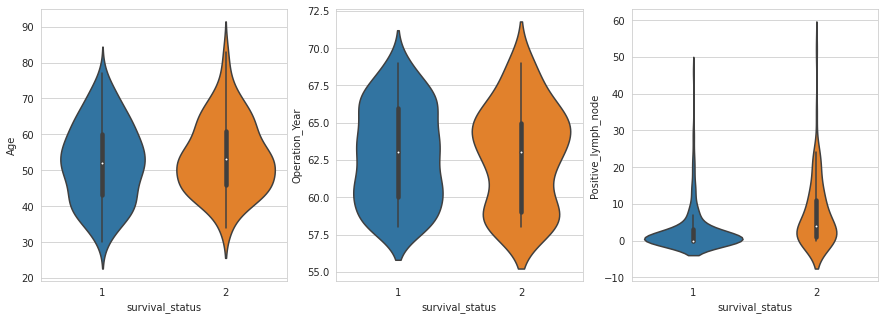

In [69]:
fig , axes=plt.subplots(1,3,figsize=(15,5))
for idx,feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot(x='survival_status', y=feature, data=df,ax=axes[idx])
plt.show()

> Observation:

* The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
* Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
* From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.

# Contour plot

[]

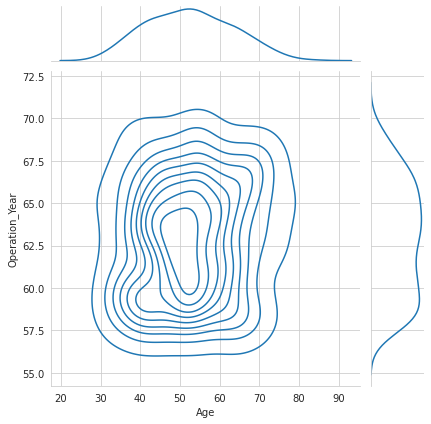

In [71]:
sns.jointplot(x='Age',y='Operation_Year', data=df, kind="kde")
plt.plot()

# Observation: There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60.



# Conclusions:
* There are 306 observations with 4 features in the data set.
* It is an imbalanced dataset with-
*            a. 225 patients belonging to status 1, those who survived for 5 years and longer and
*            b. 81 patients belonging to status 2, those who survived for less than 5 years.
* Using scatter plot(Bi-variate analysis) -
*            a. Most of the people have zero positive_lymph_nodes.
*            b. We cannot distinguish between the people who survived and who didn't survive.
* Using Pair-plot concept(Bi-variate analysis)-
*            a. positive_lymph_nodes VERSUS Age is the useful plot to atleast get the insight that most people who survived have 0 postive lymph nodes detected.
*            b. Age and Operation_Year have overlapping curves which makes difficult for classifying the survival status.
*            c. but we cannot distinguish the data easily with the help of these plots as most of them are overlapping.                          
* Using PDFs(Uni-variate Analysis)-
*            a.  both Age and Operation_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.
*            b. positive_lymph_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero positive_lymph_nodes.
*            c. More number of people are not survived in year of operation of 1965.
* Using CDFs(Uni-variate analysis)-
*            a. We can observe that almost for all the features the statistics are similar except for positive_lymph_nodes.
*            b. We can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of positive_lymph_node have survived over 5 years.
*         The mean(average) of positive_lymph_nodes is more for people who died within 5 years than people who have survived for more than 5 years.
* Mean age of patients who survived is 52 years and who didn't survive is 54 years.
* Using Box plot and Violin plots-
*            a. The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
*            b. Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
*            c. From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66. 
* Using Contour plot-
*            a. There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60.